In [4]:
from utils import * 

In [5]:
import imageio
import numpy as np
import scipy
from scipy.fftpack import dct
from scipy.signal import correlate
from math import floor
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [6]:
im1 = imageio.imread('img/test1.png')
im2 = imageio.imread('img/test2.png')
im3 = imageio.imread('img/test3.png')


def plot(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img,cmap=plt.cm.RdBu)
    plt.xticks([]),plt.yticks([])
    plt.show()

### Compute the DCT of the blocks in each image

In [9]:
blocks1 = img_to_blocks(im1)
dct_blocks1 = dct2(blocks1)

blocks2 = img_to_blocks(im2)
dct_blocks2 = dct2(blocks2)

blocks3 = img_to_blocks(im3)
dct_blocks3 = dct2(blocks3)


In [23]:
def plt_fft(hist):
    H = np.fft.fft(hist)
    H = np.roll(H,int(H.size/2))
    x = [i - int(H.size / 2)  for i in range(H.size)]

    plt.figure()
    plt.plot(x, np.abs(H))
    plt.show()
    
    return np.abs(H)
    
def plot_hist_info(values, bin_size=1):

    bins=range(
        int(np.floor(values.min())),
        int(np.ceil(values.max())),
        bin_size
    )

    hist,_,_ = plt.hist(values, bins=bins)
    autocorr = np.correlate(hist, hist, mode='same')

    plt.figure(figsize=(10,5))
    
    plt.plot(autocorr[int(autocorr.size / 2):int(autocorr.size / 2)+100])
    plt.figure()
    H = plt_fft(hist)
    
    return hist, autocorr, H

In [11]:
t = np.array([[16, 11, 10, 16],[12, 12, 14, 19],[14, 13, 16, 24], [14, 17, 22, 29]])

def get_quantized_output(t, QF):
    return np.floor(t * (2 - (QF/50)) + .5)


In [145]:
get_quantized_output(t, 76)  # 74 -> 76

array([[ 8.,  5.,  5.,  8.],
       [ 6.,  6.,  7.,  9.],
       [ 7.,  6.,  8., 12.],
       [ 7.,  8., 11., 14.]])

## Image 1
- This image is likely a raw image that has not been JPEG compressed before

In [ ]:
h, _,_ = plot_hist_info(dct_blocks1[:,:,0,0].flatten())


## Image 2
- This image has likely been compressed and decompressed once at QF=72. See coeefecient periodicity in Google doc.

In [ ]:
plot_hist_info(dct_blocks2[:,:,0,0].flatten())

## Image 3
- This image has likely been compressed and decompressed twice. It has an autocorrelation for hist bins = 1, spacing = 10 and 40

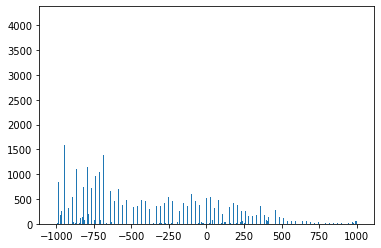

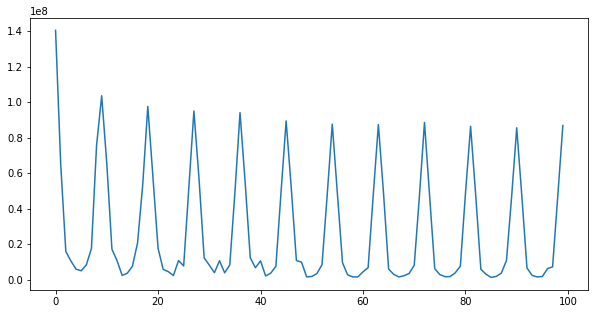

<Figure size 432x288 with 0 Axes>

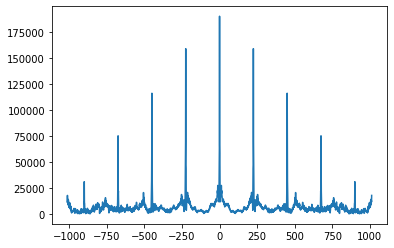

In [25]:
h, a, f = plot_hist_info(dct_blocks2[:,:,0,0].flatten(), bin_size=1)

<BarContainer object of 60 artists>

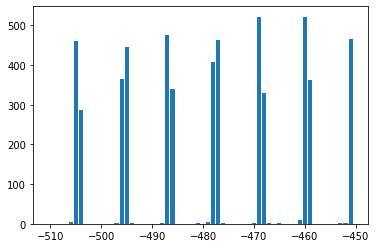

In [26]:
values = dct_blocks2[:,:,0,0].flatten()
bins=range(
    int(np.floor(values.min())),
    int(np.ceil(values.max())),
    1
)

hist, edges = np.histogram(dct_blocks2[:,:,0,0].flatten(), bins=bins)

plt.bar(edges[500:560], hist[500:560])


array([ 0,  0, 44, 33,  0,  0,  0,  0,  0, 30, 35,  0,  0,  0,  0,  2, 30,
       31,  1,  0,  0,  0,  1, 29, 36,  0,  0,  0,  0,  0, 48, 61,  0,  0,
        0,  0,  0, 32, 36,  0,  0,  0,  0,  1, 26, 26,  0,  0,  0,  0,  1,
       18, 22,  0,  0,  0,  0,  1, 24, 22,  0,  0,  0,  0,  0, 18, 16,  0,
        0,  0,  0,  0, 44, 36,  0,  0,  0,  0,  0, 21, 21,  0,  0,  0,  0,
        0, 26, 17,  0,  0,  0,  0,  0, 21, 25,  0,  0,  0,  0,  0, 18, 14,
        0,  0,  0,  0,  0, 16, 14,  0,  0,  0,  0,  0, 31, 36,  0,  0,  0,
        0,  1, 23, 23,  0,  0,  0,  0,  0, 16, 13,  0,  0,  0,  0,  0, 12,
       14,  1,  0,  0,  0,  0, 18, 11,  0,  0,  0,  0,  0, 19, 12,  0,  0,
        0,  0,  0, 26, 20,  0,  0,  0,  0,  0, 17, 15,  0,  0,  0,  0,  0,
       19, 18,  0,  0,  0,  0,  0, 11, 13,  0,  0,  0,  0,  0, 19, 11,  0,
        0,  0,  0,  0, 14,  8,  0,  0,  0,  0,  0, 24, 26,  0,  0,  0,  0,
        0,  9, 19,  0,  0,  0,  0,  0, 12,  7,  0,  0,  0,  0,  0, 10, 16,
        1,  0,  0,  0,  0

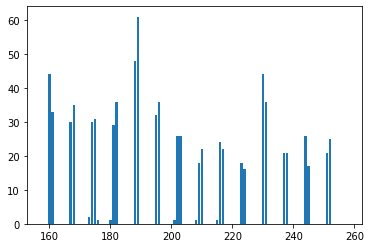

In [153]:
values = dct_blocks3[:,:,0,1].flatten()
bins=range(
    int(np.floor(values.min())),
    int(np.ceil(values.max())),
    1
)

hist, edges = np.histogram(dct_blocks3[:,:,0,1].flatten(), bins=bins)

plt.bar(edges[600:700], hist[600:700])



hist[600:]

In [121]:
autocorr[int(autocorr.size/2):int(autocorr.size/2)+100]

array([2386969, 1197976,    7497,    1494,    2172,    8049,  586667,
       1143189,  565458,    4923,    1231,    2034,    4647,  423605,
        857577,  438669,    3957,    1095,    1473,    6235,  361910,
        718117,  364592,    3946,     722,    2712,    5550,  284874,
        587272,  308281,    2370,     846,    1692,    5613,  241360,
        504689,  270608,    2409,     621,    1452,    3490,  258401,
        531904,  278042,    1910,     521,     541,    2304,  133868,
        271708,  141908,    1443,     530,     711,    2811,  120364,
        240413,  122873,    1239,     526,    1367,    1659,  112702,
        209450,   98208,    1005,     525,     609,     868,   90375,
        177152,   87693,     853,    1045,    1265,    1633,   99781,
        178679,   80635,     909,     119,     931,    1860,   92629,
        172205,   81811,    1371,      50,       0,       0,   45570,
         89280,   43857,     141,       0,       0,       0,       0,
             0,     

### Question: What happens to histogram periodicity based on different orders of floor division? 

Autocorrelation: 
General rule: The second periodicity dominates, but when intervals near the first are near the amplitude increases. 

Histogram: 
- Small -> large: periodicity in bin magnitude
- Large -> small: periodicity in bin distirbution 


- Next: see if can, given a few bins, estimate a range of quantization factors for the first compression step for image 2
- Plan out sequence of steps for how to show this information

In [160]:
def plt_hist_segment(vals, start, end):
    plt.figure(figsize=(12,10))
    bins=range(
        int(np.floor(vals.min())),
        int(np.ceil(vals.max())),
        1
    )

    hist, edges = np.histogram(vals, bins=bins)

    plt.bar(edges[start:end], hist[start:end])
    plt.show()
    

In [171]:
arr = np.random.rand(100000) * 1000

a = 5
b = 7

q1 = a*1.05 * (arr // a)
q2 = b*1.02 * (q1 // b)



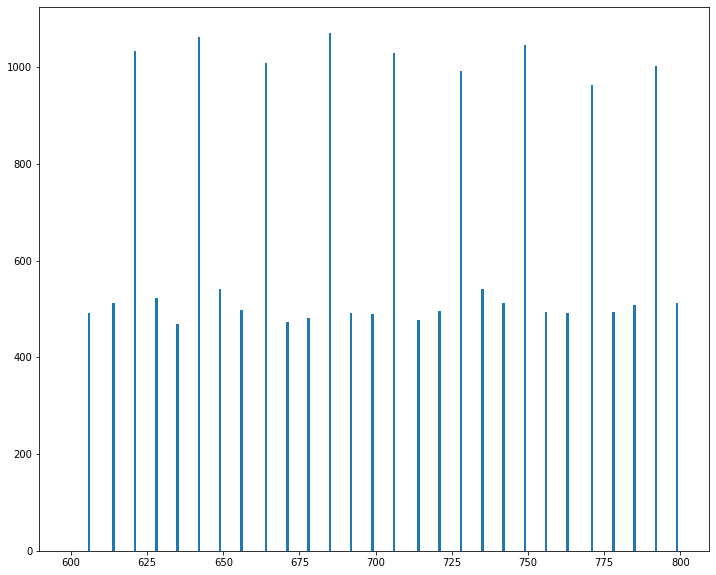

In [172]:
plt_hist_segment(q2, 600, 800)